<a href="https://colab.research.google.com/github/zongqi-wang/578-Data-Visualization/blob/main/Data_Exploration_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 578 Data Visualization Group 9 Data Exploration and Visualization

This is a group project for the CSE 578 class. The goal of this project is to find factors that determine one's income using the United States Census Bureau data set. The data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/).


### Group Members:

*   Mahan Abbasian
*   Jeffrey Cheng
* Disha Harishkumar
* Prasanth Sivanappan Sobhana
* Zongqi Wang
* Injae Wi



In [69]:
# Loading required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
from matplotlib.legend import Legend

from statsmodels.graphics.mosaicplot import mosaic

import seaborn as sns
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') 

In [5]:
# URL of the data. They have been uploaded to Github for easy and public access
train_data_url = 'https://raw.githubusercontent.com/zongqi-wang/578-Data-Visualization/main/adult.data'
test_data_url = 'https://raw.githubusercontent.com/zongqi-wang/578-Data-Visualization/main/adult.test'

## Loading data set into train and test data frames

Training data and Testing data are loaded in seperately. Their column names are as follows:

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

* 50k: Binary. >50k or <=50k. We will use this as the dependent variable

In [3]:
#loading training data
train_dat = pd.read_csv(train_data_url, index_col=False, sep=", ",
                        names = ["age", "workclass", "fnlwgt", "education", "education-num", 
                                 "marital-status", "occupation", "relationship", "race", 
                                 "sex", "capital-gain", "capital-loss", "hours-per-week", 
                                 "native-country", '50k'],
                        dtype = {
                            'age': np.int32, 
                            'workclass': 'category',
                            'fnlwgt': np.int32,
                            'education':'category',
                            'education-num': np.int32,
                            'marital-status':'category',
                            'occupation':'category',
                            'relationship':'category',
                            'race':'category',
                            'sex':'category',
                            'capital-gain': np.int32,
                            'capital-loss': np.int32,
                            'hours-per-week': np.int32,
                            'native-country': 'category',
                            '50k': 'category'
                        })
# Checking data
train_dat.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#loading test data
test_dat = pd.read_csv(test_data_url, index_col=False, sep=", ",
                       skiprows = 1,
                        names = ["age", "workclass", "fnlwgt", "education", "education-num", 
                                 "marital-status", "occupation", "relationship", "race", 
                                 "sex", "capital-gain", "capital-loss", "hours-per-week", 
                                 "native-country", '50k'],
                        dtype = {
                            'age': np.int32, 
                            'workclass': 'category',
                            'fnlwgt': np.int32,
                            'education':'category',
                            'education-num': np.int32,
                            'marital-status':'category',
                            'occupation':'category',
                            'relationship':'category',
                            'race':'category',
                            'sex':'category',
                            'capital-gain': np.int32,
                            'capital-loss': np.int32,
                            'hours-per-week': np.int32,
                            'native-country': 'category',
                            '50k': 'category'
                        })
test_dat.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


## Data Exploration:

First, let's check for training data's basic information.

In [7]:
def eda(data):
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Shape of Data----------")
    print(data.shape)

In [8]:
eda(train_dat)

----------Missing value-----------
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50k               0
dtype: int64
----------Null value-----------
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50k               0
dtype: int64
----------Shape of Data----------
(32561, 15)


There are no null values and missing values on the surface. But there are missing valus we have to deal with. We will explore that when taking a look at categorical data.



In [9]:
cat_df = train_dat.select_dtypes('category')

In [10]:
for c in cat_df.columns:
    print("---- %s ---" % c)
    print(cat_df[c].value_counts())

---- workclass ---
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
---- education ---
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
---- marital-status ---
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
---- occupation ---
Prof-specialty      

There seems to have a lot fo rows with '?'. Those are the missing data. We need to remove them.

In [11]:
train_dat.workclass = train_dat.workclass.cat.remove_categories(['?'])
train_dat.occupation = train_dat.occupation.cat.remove_categories(['?'])
train_dat['native-country']= train_dat['native-country'].cat.remove_categories(['?'])

Let's run this again to see what happened

In [12]:
eda(train_dat)

----------Missing value-----------
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
50k                  0
dtype: int64
----------Null value-----------
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
50k                  0
dtype: int64
----------Shape of Data----------
(32561, 15)


Great. Those rows with question marks have been reassigned to NaN. We will look at those rows.

In [13]:
null_data = train_dat[train_dat.isnull().any(axis=1)]
null_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Most of these null values appear to be in workclass and occupation, and a lot of them appear together in the same row, which is understandable. These attributes should be very important in predicting income, but some of the rows in the test set is missing these two columns as well. We need to build a data pipeline to deal with the missing data.

In [14]:
## TODO

# Data Visualization

## Numerical Data

In [15]:
ppl_with_gains = train_dat[train_dat['capital-gain']>0]
ppl_with_losses = train_dat[train_dat['capital-loss']>0]
ppl_with_gains['50k'].describe()

count     2712
unique       2
top       >50K
freq      1677
Name: 50k, dtype: object

In [16]:
num_df = train_dat.select_dtypes(np.int32)
num_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bf58bed90>,
      dtype=object)

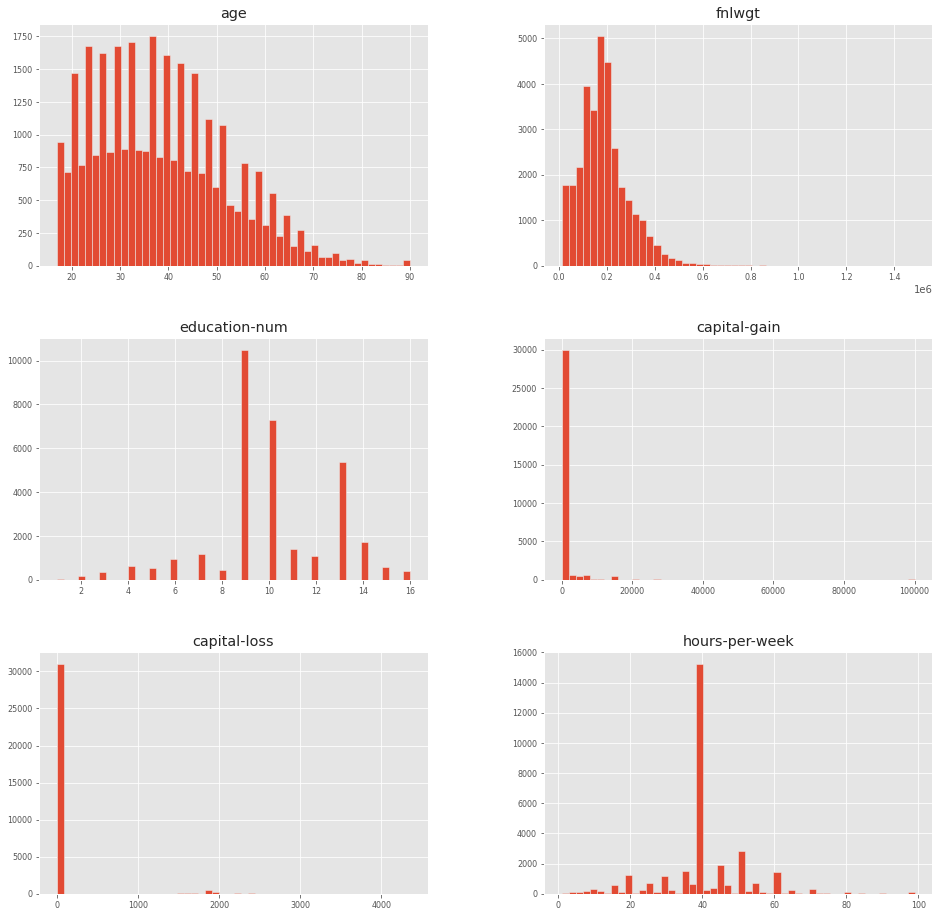

In [17]:
# Histograms of the numerical data types. 
num_df.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8)

Capital-loss and Capital gain are mostly 0 for the data. We should take a look at them specifically

## Categorical Data

There are 8 categorical data columns in total (not including dependent variable). We will need to remove null values before graphing them.

In [22]:
cat_df = train_dat.select_dtypes('category')
cat_df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,50k
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [23]:
cat_df = cat_df[cat_df.notnull().any(axis=1)]

In [50]:
cat_df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

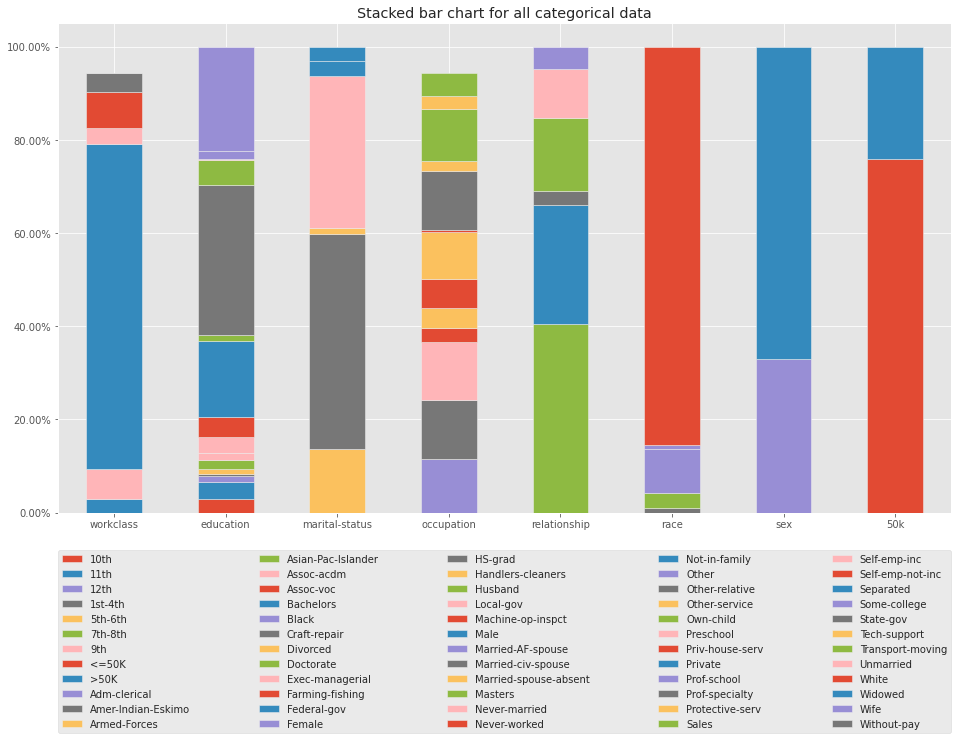

In [99]:
counts = cat_df.drop('native-country', axis=1).apply(lambda x: x.value_counts() / len(x)).transpose()
fig = plt.figure()
ax = fig.add_subplot(111)
counts.plot(ax=ax,kind='bar', stacked=True, rot=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.legend( bbox_to_anchor=(0, -.45, 1, .102), loc='lower left',
           ncol=5, mode="expand", borderaxespad=0.)
plt.title('Stacked bar chart for all categorical data')
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


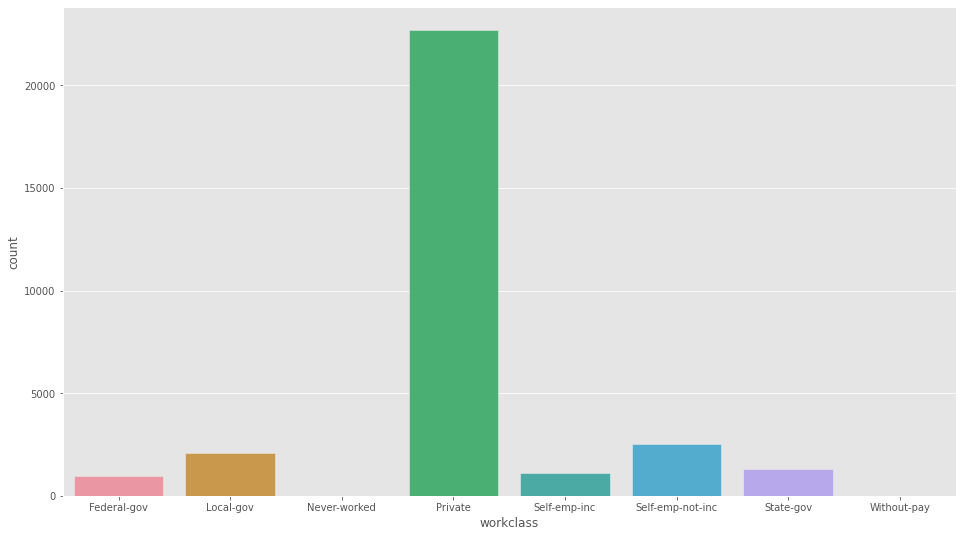

In [26]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(cat_df.workclass)
plt.show()

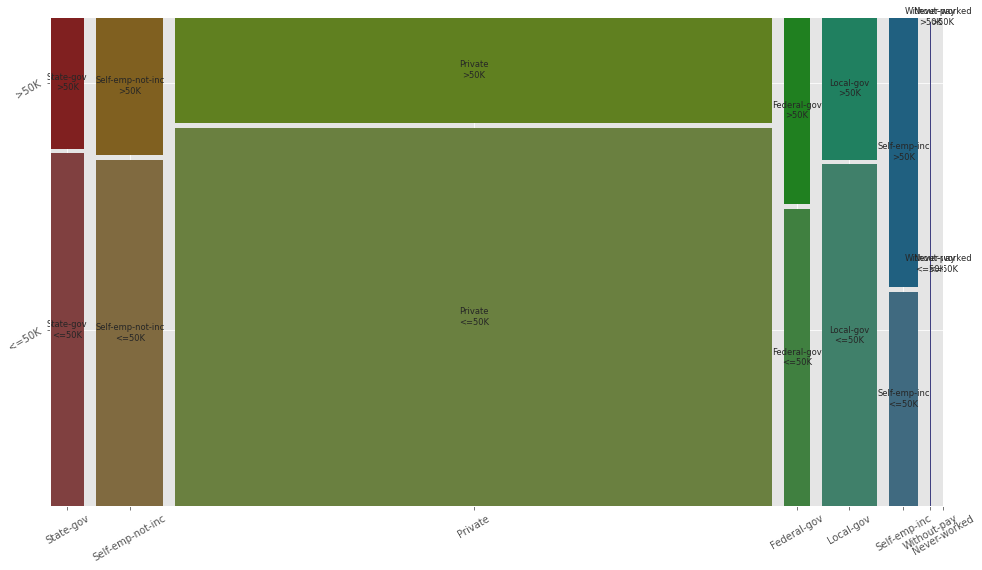

In [49]:
plt.rcParams["figure.figsize"] = (16,9)
mosaic(cat_df, ['workclass', '50k'], horizontal=True, gap = 0.015, label_rotation=30)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(cat_df.education)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


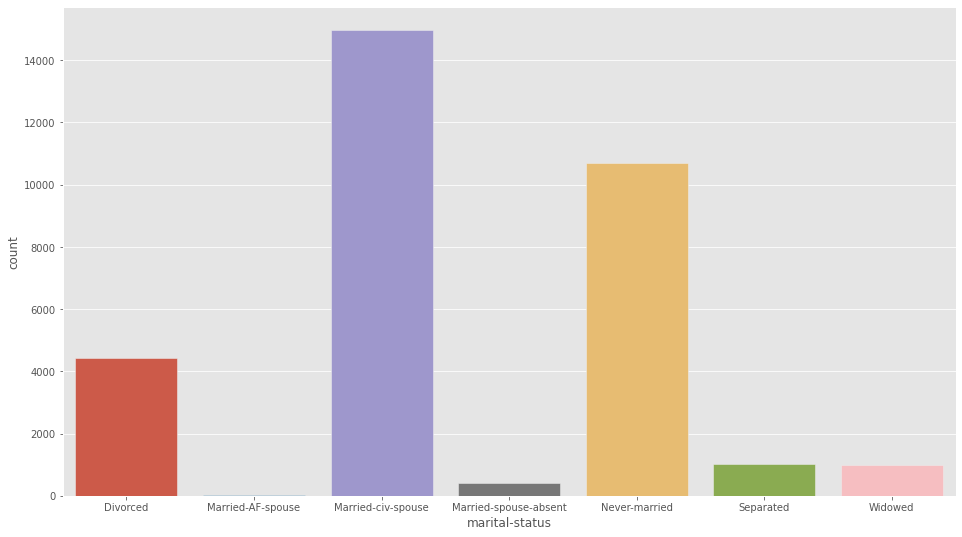

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(cat_df['marital-status'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


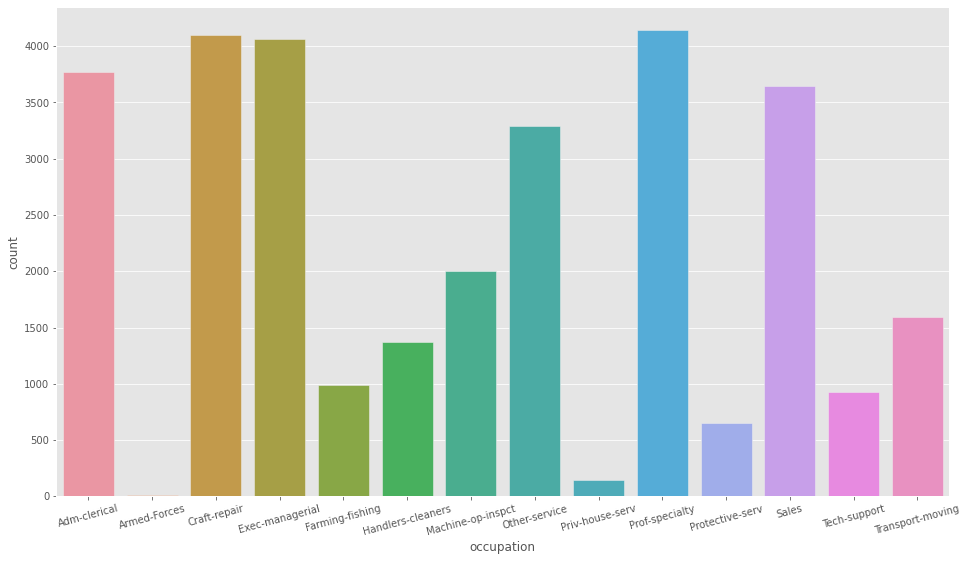

In [93]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(cat_df.occupation, orient = 'h')
plt.xticks(rotation=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


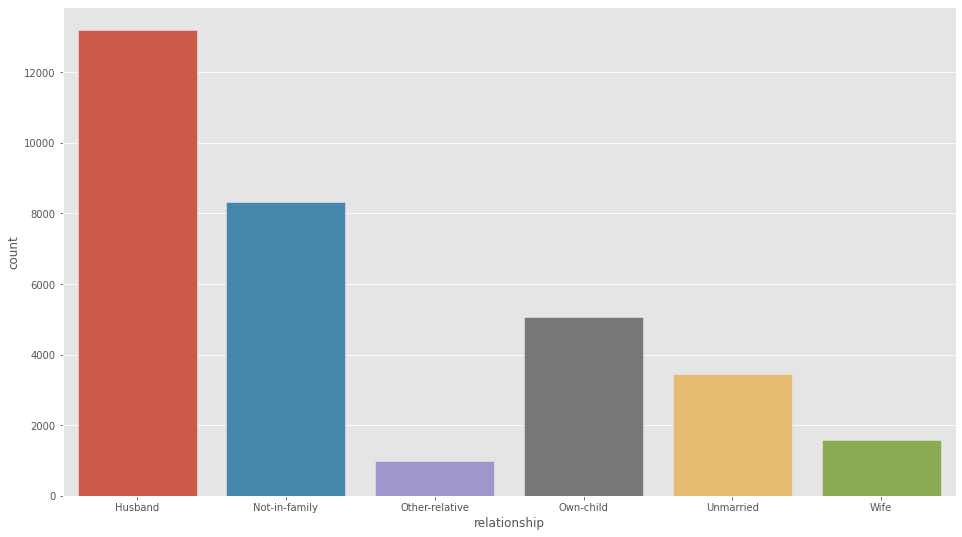

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(cat_df.relationship)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


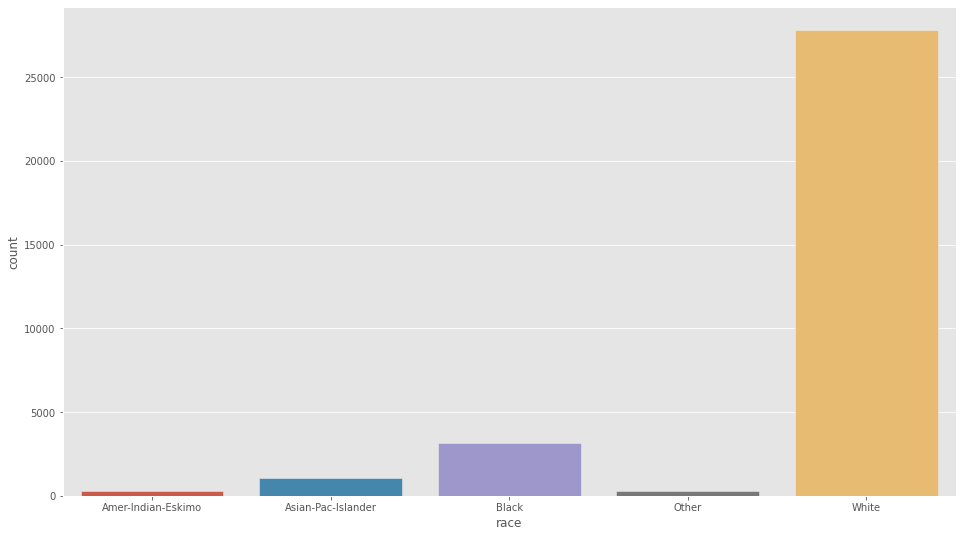

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(cat_df.race)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


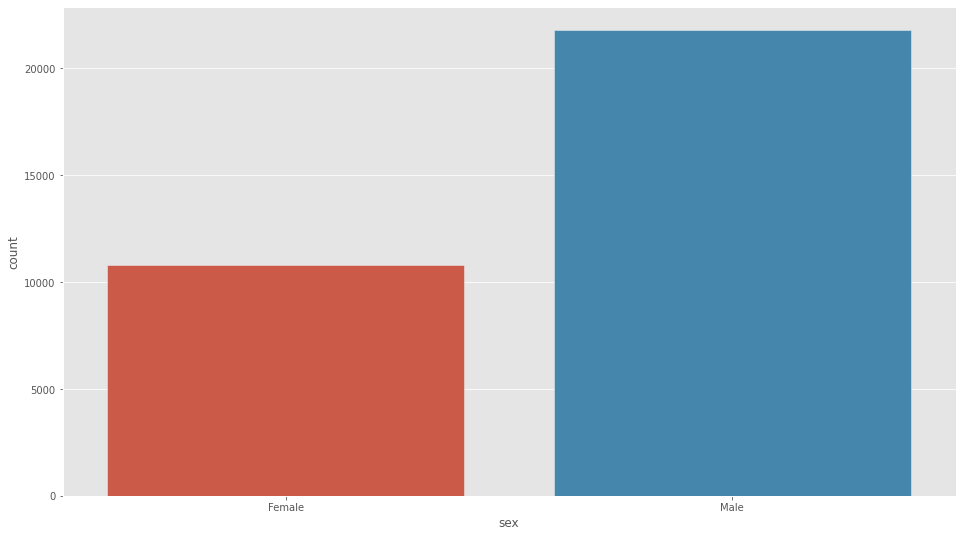

In [74]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(cat_df.sex)
plt.show()

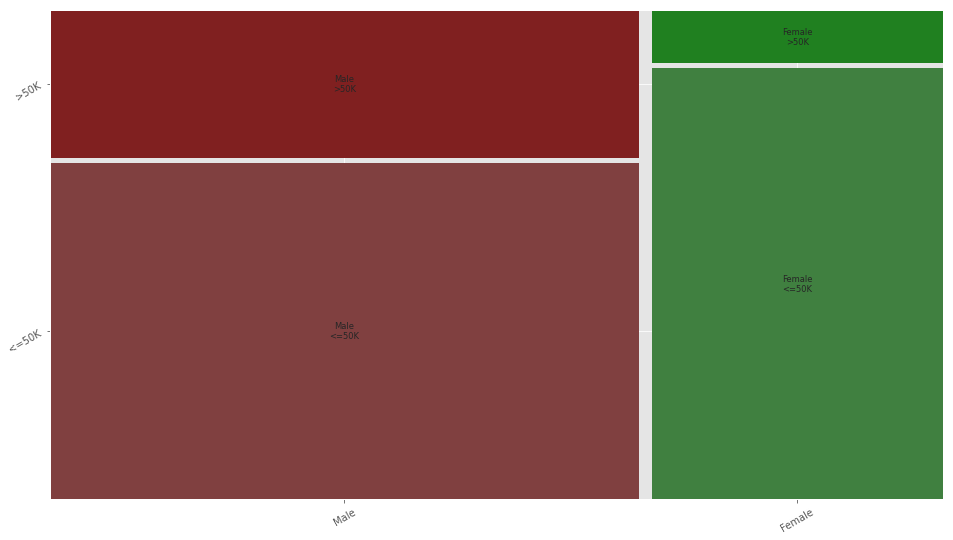

In [75]:
plt.rcParams["figure.figsize"] = (16,9)
mosaic(cat_df, ['sex', '50k'], horizontal=True, gap = 0.015, label_rotation=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


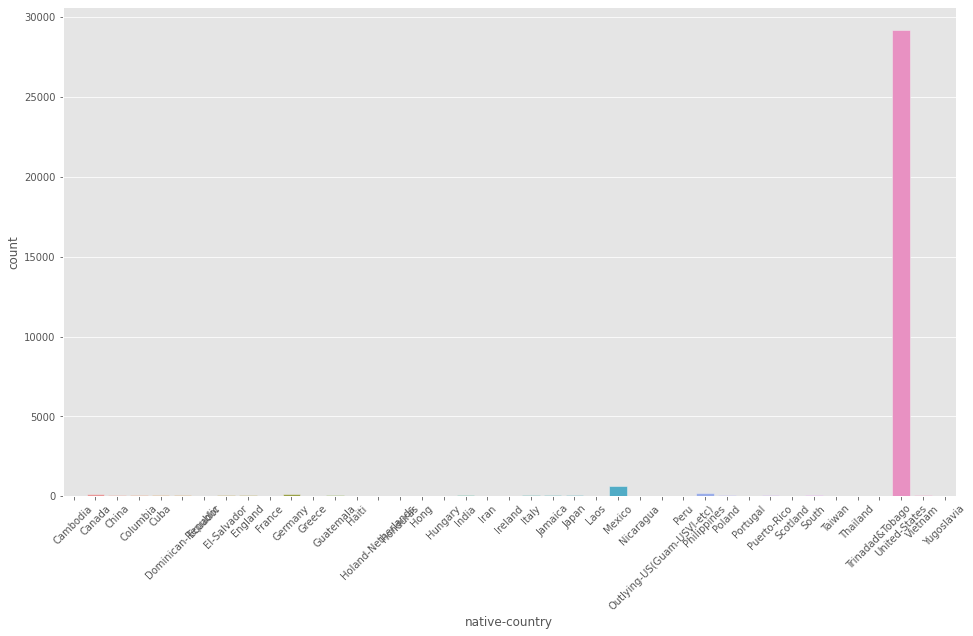

In [89]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(cat_df['native-country'], orient='v')
plt.xticks(rotation=45)
plt.show()

# YOUR NAME

----------------------- END ----------------------